## Feature selection

Create own functions to filter features based on the following criteria:

* lower variance than x
* number of missing values is more than *x* %
* one of each pair of features, which are correlated together more than *x*

Use two data sources as input:
- output dataset from the feature engineering exercise last week.
- output dataset from the PCA exercise

Apply your functions to the combination of these two datasource and come up with the final dataset that can be used for training.

> #### Note
> Don't forget to keep target variable (duration_seconds) intact

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest


import seaborn as sns
import os

from scipy import stats

import datetime

%matplotlib inline

In [3]:
data_UFO = pd.read_csv('UFO_with_dummies.csv', sep = ',')
data_PCA = pd.read_csv('UFO_PCA.csv', sep = ',')

In [4]:
data_UFO = data_UFO.drop('Unnamed: 0', axis = 1)
data_PCA = data_PCA.drop('Unnamed: 0', axis = 1)

In [5]:
data_PCA.head()

,PC1,PC2,PC3,PC4,duration_seconds
0,-0.386374,-1.600554,-0.157397,-0.462842,2700.0
1,-0.174551,-1.802100,-0.646125,-0.487443,7200.0
2,3.645693,1.112858,0.007116,-2.893792,20.0
3,0.493706,-0.417945,0.980050,-0.548708,20.0
4,1.483583,-0.934297,0.497367,-1.366090,900.0


In [6]:
numerical = list(data_UFO.dtypes[data_UFO.dtypes != 'object'].index)
categorical = list(data_UFO.dtypes[data_UFO.dtypes == 'object'].index)

In [7]:
numerical_PCA = list(data_PCA.dtypes[data_PCA.dtypes != 'object'].index)
categorical_PCA = list(data_PCA.dtypes[data_PCA.dtypes == 'object'].index)

In [8]:
numerical_PCA.remove('duration_seconds')
numerical_PCA

['PC1', 'PC2', 'PC3', 'PC4']

In [9]:
numerical.remove('duration_seconds')

In [10]:
data_UFO

,duration_seconds,lat,lng,cloudCover,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,shape_oval,shape_pyramid,shape_rectangle,shape_round,shape_sphere,shape_teardrop,shape_triangle,shape_unknown,precipType_rain,precipType_snow
0,2700.0,29.883056,-97.941111,0.00,0.730000,0.0,0.0,1009.050000,25.860000,16.09,...,0,0,0,0,0,0,0,0,0,0
1,7200.0,29.384210,-98.581082,0.00,0.770000,0.0,0.0,1008.810000,26.120000,16.09,...,0,0,0,0,0,0,0,0,0,0
2,20.0,53.200000,-2.916667,0.75,0.840000,0.0,0.0,1019.000000,15.560000,2.90,...,0,0,0,0,0,0,0,0,1,0
3,20.0,28.978333,-96.645833,0.12,0.710000,0.0,0.0,1020.640000,22.680000,16.09,...,0,0,0,0,0,0,0,0,1,0
4,900.0,21.418056,-157.803611,0.63,0.770000,0.0,0.0,1015.330000,25.740000,16.09,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78781,300.0,40.693611,-75.190556,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,0,0,0
78782,300.0,47.483056,-122.215833,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,0,0,0
78783,10.0,38.232500,-122.635556,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,0,0,0
78784,180.0,40.499167,-74.399444,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,1,0,0


In [11]:
data_PCA

,PC1,PC2,PC3,PC4,duration_seconds
0,-0.386374,-1.600554,-0.157397,-0.462842,2700.0
1,-0.174551,-1.802100,-0.646125,-0.487443,7200.0
2,3.645693,1.112858,0.007116,-2.893792,20.0
3,0.493706,-0.417945,0.980050,-0.548708,20.0
4,1.483583,-0.934297,0.497367,-1.366090,900.0
...,...,...,...,...,...
78781,-0.881323,0.044489,0.405969,0.208595,300.0
78782,-0.881323,0.044489,0.405969,0.208595,300.0
78783,-0.881323,0.044489,0.405969,0.208595,10.0
78784,-0.881323,0.044489,0.405969,0.208595,180.0


# Low variance

In [12]:
def lower_variance(data, threshold):
    vt = VarianceThreshold(threshold)
    data_transformed = vt.fit_transform(data)
    selected_columns = data.columns[vt.get_support()]
    data_transformed = pd.DataFrame(data_transformed, columns = selected_columns)
    return(data_transformed)

# High correlation

In [13]:
def high_correlation(data, threshold):
    data_high_cor = data
    df_corr = data.corr().abs()
    indices = np.where(df_corr > threshold) 
    indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
    
    for idx in indices:
        try:
            data_high_cor.drop(idx[1], axis = 1, inplace=True)
        except KeyError:
            pass
    
    return(data_high_cor)

## UFO output

In [14]:
UFO_high_corr = high_correlation(data_UFO, 0.8)
UFO_high_corr

,duration_seconds,lat,lng,cloudCover,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,shape_oval,shape_pyramid,shape_rectangle,shape_round,shape_sphere,shape_teardrop,shape_triangle,shape_unknown,precipType_rain,precipType_snow
0,2700.0,29.883056,-97.941111,0.00,0.730000,0.0,0.0,1009.050000,25.860000,16.09,...,0,0,0,0,0,0,0,0,0,0
1,7200.0,29.384210,-98.581082,0.00,0.770000,0.0,0.0,1008.810000,26.120000,16.09,...,0,0,0,0,0,0,0,0,0,0
2,20.0,53.200000,-2.916667,0.75,0.840000,0.0,0.0,1019.000000,15.560000,2.90,...,0,0,0,0,0,0,0,0,1,0
3,20.0,28.978333,-96.645833,0.12,0.710000,0.0,0.0,1020.640000,22.680000,16.09,...,0,0,0,0,0,0,0,0,1,0
4,900.0,21.418056,-157.803611,0.63,0.770000,0.0,0.0,1015.330000,25.740000,16.09,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78781,300.0,40.693611,-75.190556,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,0,0,0
78782,300.0,47.483056,-122.215833,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,0,0,0
78783,10.0,38.232500,-122.635556,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,0,0,0
78784,180.0,40.499167,-74.399444,0.00,0.660547,0.0,0.0,1016.819541,13.496951,16.09,...,0,0,0,0,0,0,0,1,0,0


### PCA output

In [15]:
PCA_high_corr = high_correlation(data_PCA, 0.8)
PCA_high_corr

,PC1,PC2,PC3,PC4,duration_seconds
0,-0.386374,-1.600554,-0.157397,-0.462842,2700.0
1,-0.174551,-1.802100,-0.646125,-0.487443,7200.0
2,3.645693,1.112858,0.007116,-2.893792,20.0
3,0.493706,-0.417945,0.980050,-0.548708,20.0
4,1.483583,-0.934297,0.497367,-1.366090,900.0
...,...,...,...,...,...
78781,-0.881323,0.044489,0.405969,0.208595,300.0
78782,-0.881323,0.044489,0.405969,0.208595,300.0
78783,-0.881323,0.044489,0.405969,0.208595,10.0
78784,-0.881323,0.044489,0.405969,0.208595,180.0


<AxesSubplot:>

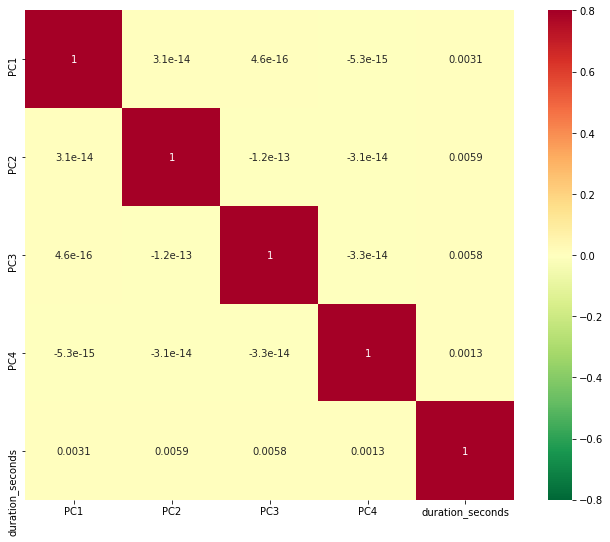

In [188]:
corrmat = data_PCA.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = -0.8, vmax=.8,annot = True, square=True,cmap="RdYlGn_r")

# Low variance

### PCA output

In [16]:
data_PCA_low_var = lower_variance(PCA_high_corr, 0.1)
data_PCA_low_var

,PC1,PC2,PC3,PC4,duration_seconds
0,-0.386374,-1.600554,-0.157397,-0.462842,2700.0
1,-0.174551,-1.802100,-0.646125,-0.487443,7200.0
2,3.645693,1.112858,0.007116,-2.893792,20.0
3,0.493706,-0.417945,0.980050,-0.548708,20.0
4,1.483583,-0.934297,0.497367,-1.366090,900.0
...,...,...,...,...,...
78781,-0.881323,0.044489,0.405969,0.208595,300.0
78782,-0.881323,0.044489,0.405969,0.208595,300.0
78783,-0.881323,0.044489,0.405969,0.208595,10.0
78784,-0.881323,0.044489,0.405969,0.208595,180.0


### UFO output

In [17]:
data_lower_var = lower_variance(UFO_high_corr, 0.1)
data_lower_var

,duration_seconds,lat,lng,cloudCover,precipIntensity,pressure,temperature,visibility,windBearing,windSpeed,ast_estimated_diameter,ast_miss_distance,ast_relative_velocity,month,shape_light,precipType_rain
0,2700.0,29.883056,-97.941111,0.00,0.0,1009.050000,25.860000,16.09,154.0,4.89,0.297879,42621696.0,13778.372043,10.0,0.0,0.0
1,7200.0,29.384210,-98.581082,0.00,0.0,1008.810000,26.120000,16.09,135.0,6.60,0.297879,42621696.0,13778.372043,10.0,1.0,0.0
2,20.0,53.200000,-2.916667,0.75,0.0,1019.000000,15.560000,2.90,190.0,2.24,0.297879,42621696.0,13778.372043,10.0,0.0,1.0
3,20.0,28.978333,-96.645833,0.12,0.0,1020.640000,22.680000,16.09,136.0,2.75,0.297879,42621696.0,13778.372043,10.0,0.0,1.0
4,900.0,21.418056,-157.803611,0.63,0.0,1015.330000,25.740000,16.09,80.0,3.60,0.297879,42621696.0,13778.372043,10.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78781,300.0,40.693611,-75.190556,0.00,0.0,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,32868.357670,9.0,1.0,0.0
78782,300.0,47.483056,-122.215833,0.00,0.0,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,32868.357670,9.0,0.0,0.0
78783,10.0,38.232500,-122.635556,0.00,0.0,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,32868.357670,9.0,0.0,0.0
78784,180.0,40.499167,-74.399444,0.00,0.0,1016.819541,13.496951,16.09,190.0,2.24,0.056760,3610758.0,32868.357670,9.0,0.0,0.0
